In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
def ver_imag(path):
    img = Image.open(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

Las aplicaciones basadas en Procesamiento de Lenguaje Natural (PLN) han experimentado un gran auge en los últimos años. Cada día surgen nuevos casos de uso y, para mantenerse al ritmo de la demanda siempre cambiante, lo que se necesita en este momento es investigar, innovar y construir soluciones eficientes para resolver los problemas complejos que enfrentamos. La innovación en el campo del PLN a lo largo de los años ha hecho posible resolver algunos de los problemas más desafiantes, como la traducción de lenguajes y la creación de chatbots, entre otros.

 Comenzaremos desarrollando una comprensión de los modelos de Secuencia a Secuencia (Seq2Seq) y discutiremos los codificadores y decodificadores en el proceso. Utilizaremos este nuevo conocimiento para construir un traductor de francés a inglés usando el modelado Seq2Seq. Luego, echaremos un vistazo al mecanismo de atención, uno de los desarrollos clave recientes. El mecanismo de atención no solo ha mejorado las capacidades de inferencia de las arquitecturas existentes, sino que también ha allanado el camino para el desarrollo de otras arquitecturas increíblemente eficientes, como los Transformadores y las Representaciones Codificadoras Bidireccionales de Transformadores (BERT),

* Modelado Seq2Seq
* Traducción entre idiomas utilizando modelado Seq2Seq
* Prestemos atención
* Transformadores
* BERT


# Modelado Seq2Seq
Antes de comenzar con el modelado Seq2Seq, me gustaría compartir una anécdota que presencié en el aeropuerto de Bengaluru, en India. Un viajero de China estaba tratando de pedir una comida en uno de los restaurantes del aeropuerto, y el camarero no podía comprender el mandarín. Un espectador intervino y utilizó Google Translate para convertir el inglés que hablaba el propietario de la tienda en mandarín, y viceversa. El modelado Seq2Seq ha permitido crear aplicaciones como Google Translate, que hicieron posible la conversación entre estas personas.

Cuando intentamos construir chatbots o sistemas de traducción de idiomas, esencialmente tratamos de convertir una secuencia de texto de una longitud arbitraria en otra secuencia de texto de una longitud desconocida. Por ejemplo, el mismo chatbot podría responder con una palabra o con varias palabras, dependiendo de los mensajes conversacionales que reciba de la otra parte involucrada en la conversación. No siempre respondemos con texto de la misma longitud. Vimos esto como una de las variantes "muchos a muchos" de la arquitectura RNN. Esta arquitectura se conoce como modelado Seq2Seq, donde tratamos de convertir una secuencia en otra.

Consideremos el ejemplo de la traducción de idiomas.
La frase en inglés how are you doing? se escribe como ¿cómo estás? en español. Estas dos frases tienen longitudes diferentes. Pensemos en otro ejemplo: can we do this? en inglés se representa como ¿podemos hacer esto? en español. Aunque ambas frases en inglés tienen cuatro palabras, sus contrapartes en español tienen longitudes diferentes. Al construir sistemas de este tipo, tratamos de mapear una secuencia de entrada a una secuencia de salida que puede tener longitudes variables.

Bien. Ahora que entendemos qué es el modelado Seq2Seq, ¿cómo lo hacemos? Utilizamos dos bloques fundamentales, llamados Codificadores (Encoders) y Decodificadores (Decoders), para construir nuestros sistemas de modelado Seq2Seq. Estos se ilustran en el siguiente diagrama:

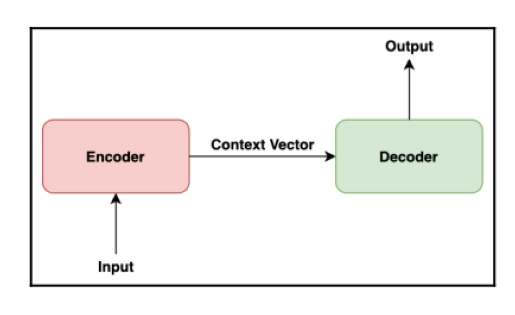

In [ ]:
ver_imag("/content/drive/MyDrive/Imagenes2/imagen10.png")
#/content/drive/MyDrive/Imagenes2/imagen10.png

Estos codificadores y decodificadores pueden construirse utilizando redes de Long Short Term Memory (LSTM), Gated Recurrent Units (GRU), entre otras. Profundicemos y entendamos cómo estos codificadores y decodificadores nos permiten construir estos sistemas.

# Codificadores
El codificador es el primer componente en la arquitectura de codificador-decodificador. Los datos de entrada se envían al codificador y este construye una representación de los datos de entrada. Esta representación de baja dimensión de los datos de entrada se conoce como el vector de contexto. Algunos textos también se refieren a él como el vector de pensamiento. El vector de contexto intenta capturar el significado de los datos de entrada. Esencialmente, trata de construir una representación (embedding) para los datos de entrada.

El codificador puede construirse utilizando RNNs, LSTMs, GRUs, o RNNs bidireccionales, entre otros. Vimos que las arquitecturas basadas en RNNs mantienen el contexto de las entradas que vieron en el estado oculto. Por lo tanto, el último estado oculto contendrá el contexto de toda la oración. El estado oculto del último paso de tiempo es lo que necesitamos. Es nuestro vector de contexto, ya que ha visto toda la entrada y ha mantenido el contexto de todas las palabras de entrada.

Pensemos en una tarea de traducción de lenguaje natural donde queremos convertir oraciones del inglés al francés. Como ejemplo, tomemos la oración Learning Natural Language Processing y veamos qué hace el codificador para convertirla en su equivalente en francés:

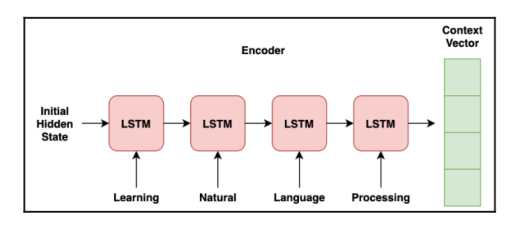

In [ ]:
ver_imag("/content/drive/MyDrive/Imagenes2/imagen11.png")

El diagrama anterior ilustra un codificador construido utilizando LSTM que desarrolla un vector de contexto para la oración en inglés Learning Natural Language Processing. La salida del codificador es el vector de contexto, que contiene dos partes:

* El estado oculto del último paso de tiempo del codificador
* El estado de memoria del LSTM para la oración de entrada

## Decodificadores
Obtenemos una representación (embedding) de nuestra oración de entrada, Learning Natural Language Processing, utilizando el codificador. La siguiente parte es decodificar este vector de contexto y construir su representación en francés, Apprendre le traitement du langage naturel. El siguiente diagrama muestra cómo un decodificador, construido utilizando LSTM, se entrena para hacer esto:

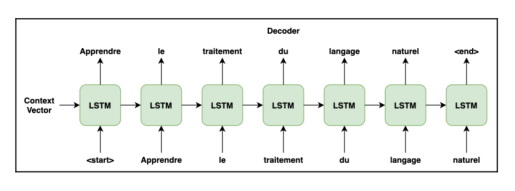

In [ ]:
ver_imag("/content/drive/MyDrive/Imagenes2/imagen12.png")

Entendamos su funcionamiento en profundidad.
Hasta ahora, hemos visto que el estado oculto inicial para cualquier arquitectura basada en RNN es un vector inicializado aleatoriamente. Sin embargo, con los decodificadores, la entrada es el vector de contexto que recibimos como salida del codificador.

Bien, ahora entendemos que el estado oculto inicial no debe ser un vector inicializado aleatoriamente, sino el vector de contexto. Sin embargo, aún no entendemos qué debería ser la entrada del decodificador.

La entrada al decodificador en el primer paso de tiempo es un token que indica el inicio de la oración, <start>. Usando este token <start>, el decodificador ahora tiene la tarea de aprender a predecir el primer token de la oración de destino. Sin embargo, el funcionamiento del decodificador es un poco diferente en las fases de aprendizaje e inferencia.

## Fase de entrenamiento
Durante la fase de entrenamiento, al decodificador se le pasa la secuencia objetivo como entrada, junto con el vector de contexto. La entrada al decodificador en el paso de tiempo 0 es el token <start>. En el paso de tiempo 1, la entrada al decodificador es el token predicho o el primer token de la secuencia objetivo, y así sucesivamente. El trabajo del decodificador aquí es aprender que, cuando se le proporciona un vector de contexto y un token inicial <start>, debería ser capaz de producir un conjunto de tokens.

# Fase de inferencia
Durante la fase de inferencia, no sabemos cuál debería ser la secuencia objetivo y es trabajo del decodificador predecir esta secuencia. El decodificador recibirá el vector de contexto y el token inicial con el cual debería ser capaz de predecir el primer token. A partir de allí, debería poder predecir el segundo token, usando el primer token predicho y el estado oculto del primer paso de tiempo, y esto debe continuar de esa manera. Esencialmente, la entrada en el paso de tiempo $t$ es la salida predicha del paso de tiempo anterior $t-1$, como se muestra en el diagrama de la sección de Decodificadores. La entrada en el paso de tiempo $1$ es Apprendre, que en realidad es la salida predicha del paso de tiempo anterior. El mismo patrón sigue para el resto del trabajo del decodificador.

Bien, ahora tenemos una idea clara del estado oculto inicial y de cómo el decodificador aprende y predice, pero necesitamos dejar de enviar salidas en el momento en que se realizan las predicciones. ¿Cómo lo hacemos?

Cada vez que la salida de un estado del decodificador es un token que indica el final de la oración, <end>, o cuando hemos alcanzado una longitud máxima predefinida de la secuencia de salida o secuencia objetivo, recibimos una señal de que el decodificador ha completado su trabajo de construir la secuencia de salida y necesitamos detenernos aquí.

Los LSTMs simples en ambos extremos nos permitieron convertir una secuencia de datos en otra utilizando solo un vector de contexto entre ellas. Este enfoque para la generación Seq2Seq se puede usar para construir chatbots, sistemas de reconocimiento de voz, sistemas de traducción de lenguaje natural, y así sucesivamente. Ahora que tenemos una comprensión teórica sólida de los sistemas de generación Seq2Seq.

1 -Como en cualquier otro ejercicio, comenzamos importando las bibliotecas que necesitamos para construir nuestro traductor de francés a inglés:

In [ ]:
import pandas as pd
import string
import re
import io
import numpy as np
from unicodedata import normalize
import keras, tensorflow
from keras.models import Model
from keras.layers import Input, LSTM, Dense

2 - Ahora que hemos importado nuestras bibliotecas, vamos a leer el conjunto de datos utilizando el siguiente bloque de código

In [ ]:
import zipfile

# Nombre del archivo ZIP ya cargado
zip_path = "/content/drive/MyDrive/Imagenes2/bilingual_pairs.zip"

# Listar y extraer los archivos
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Lista los archivos dentro del ZIP
    archivos = zip_ref.namelist()
    print("Archivos en el ZIP:", archivos)

    # Extraer todos los archivos en el directorio actual
    zip_ref.extractall()
    print("Archivos extraídos en el directorio actual.")


Archivos en el ZIP: ['bilingual_pairs.txt']
Archivos extraídos en el directorio actual.


In [ ]:
def read_data(file):
    data = []
    with io.open(file, 'r') as file:
        for entry in file:
            entry = entry.strip()
            data.append(entry)
    return data

In [ ]:
data = read_data('/content/bilingual_pairs.txt')

In [ ]:
data[139990:140000]

['Never choose a vocation just because the hours are short.\tNe choisissez jamais une profession juste parce que les heures y sont courtes.',
 "No other mountain in the world is so high as Mt. Everest.\tAucune montagne au monde n'atteint la hauteur du Mont Everest.",
 "No sooner had he met his family than he burst into tears.\tÀ peine avait-il rencontré sa famille qu'il éclata en sanglots.",
 "Nothing is more disappointing than to lose in the finals.\tRien n'est plus décevant que de perdre en finale.",
 "Now that he is old, it is your duty to go look after him.\tÀ présent qu'il est vieux, c'est ton devoir de veiller sur lui.",
 "Now that you've decided to quit your job, you look happy.\tMaintenant que vous avez décidé de quitter votre emploi, vous avez l'air heureux.",
 "Now that you've decided to quit your job, you look happy.\tMaintenant que tu as décidé de quitter ton emploi, tu as l'air heureux.",
 "Now that you've decided to quit your job, you look happy.\tMaintenant que vous avez

In [ ]:
len(data)

145437

In [ ]:
data = data[:140000]

Dividir los Datos en ingles y Frances

In [ ]:
def build_english_french_sentences(data):
    english_sentences = []
    french_sentences = []
    for data_point in data:
        english_sentences.append(data_point.split("\t")[0])
        french_sentences.append(data_point.split("\t")[1])
    return english_sentences, french_sentences

In [ ]:
english_sentences, french_sentences = build_english_french_sentences(data)

In [ ]:
len(english_sentences)

140000

In [ ]:
len(french_sentences)

140000

Limpieza de datos

In [ ]:
def clean_sentences(sentence):
    # prepare regex for char filtering
    re_print = re.compile('[^%s]' % re.escape(string.printable))
    # prepare translation table for removing punctuation
    table = str.maketrans('', '', string.punctuation)
    cleaned_sent = normalize('NFD', sentence).encode('ascii', 'ignore')
    cleaned_sent = cleaned_sent.decode('UTF-8')
    cleaned_sent = cleaned_sent.split()
    cleaned_sent = [word.lower() for word in cleaned_sent]
    cleaned_sent = [word.translate(table) for word in cleaned_sent]
    cleaned_sent = [re_print.sub('', w) for w in cleaned_sent]
    cleaned_sent = [word for word in cleaned_sent if word.isalpha()]
    return ' '.join(cleaned_sent)

In [ ]:

def build_clean_english_french_sentences(english_sentences, french_sentences):
    french_sentences_cleaned = []
    english_sentences_cleaned = []
    for sent in french_sentences:
        french_sentences_cleaned.append(clean_sentences(sent))
    for sent in english_sentences:
        english_sentences_cleaned.append(clean_sentences(sent))
    return english_sentences_cleaned, french_sentences_cleaned

In [ ]:
english_sentences_cleaned, french_sentences_cleaned = build_clean_english_french_sentences(english_sentences,
                                                                                           french_sentences)

In [ ]:
english_sentences_cleaned[40884]

'i think i can fix this'

In [ ]:
french_sentences_cleaned[40884]

'je pense que je peux arranger ca'

In [ ]:
def build_data(english_sentences_cleaned, french_sentences_cleaned):
    input_dataset = []
    target_dataset = []
    input_characters = set()
    target_characters = set()

    for french_sentence in french_sentences_cleaned:
        input_datapoint = french_sentence
        input_dataset.append(input_datapoint)
        for char in input_datapoint:
            input_characters.add(char)

    for english_sentence in english_sentences_cleaned:
        target_datapoint = "\t" + english_sentence + "\n"
        target_dataset.append(target_datapoint)
        for char in target_datapoint:
            target_characters.add(char)

    return input_dataset, target_dataset, sorted(list(input_characters)), sorted(list(target_characters))


In [ ]:
input_dataset, target_dataset, input_characters, target_characters = build_data(english_sentences_cleaned,
                                                                                french_sentences_cleaned)

In [ ]:
len(input_characters)

27

In [ ]:

len(target_characters)

29

In [ ]:
print(input_characters)

[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
print(target_characters)

['\t', '\n', ' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


Definiendo Metadata para nuestro modelos

In [ ]:
def build_metadata(input_dataset, target_dataset, input_characters, target_characters):
    num_encoder_tokens = len(input_characters)
    num_decoder_tokens = len(target_characters)
    max_encoder_seq_length = max([len(data_point) for data_point in input_dataset])
    max_decoder_seq_length = max([len(data_point) for data_point in target_dataset])

    print('Number of data points:', len(input_dataset))
    print('Number of unique input tokens:', num_encoder_tokens)
    print('Number of unique output tokens:', num_decoder_tokens)
    print('Maximum sequence length for inputs:', max_encoder_seq_length)
    print('Maximum sequence length for outputs:', max_decoder_seq_length)

    return num_encoder_tokens, num_decoder_tokens, max_encoder_seq_length, max_decoder_seq_length

In [ ]:
num_encoder_tokens, num_decoder_tokens, max_encoder_seq_length, max_decoder_seq_length = build_metadata(input_dataset,
                                                                                                        target_dataset,
                                                                                                        input_characters,
                                                                                                        target_characters)

Number of data points: 140000
Number of unique input tokens: 27
Number of unique output tokens: 29
Maximum sequence length for inputs: 117
Maximum sequence length for outputs: 58


Desarrollando mapeos de caracteres a índices y viceversa

In [ ]:
def build_indices(input_characters, target_characters):
    input_char_to_idx = {}
    input_idx_to_char = {}
    target_char_to_idx = {}
    target_idx_to_char = {}

    for i, char in enumerate(input_characters):
        input_char_to_idx[char] = i
        input_idx_to_char[i] = char

    for i, char in enumerate(target_characters):
        target_char_to_idx[char] = i
        target_idx_to_char[i] = char

    return input_char_to_idx, input_idx_to_char, target_char_to_idx, target_idx_to_char

input_char_to_idx, input_idx_to_char, target_char_to_idx, target_idx_to_char = build_indices(input_characters,
                                                                                             target_characters)

Construyendo estructuras de datos para acomodar nuestros datos

In [ ]:
def build_data_structures(length_input_dataset, max_encoder_seq_length, max_decoder_seq_length, num_encoder_tokens, num_decoder_tokens):
    encoder_input_data = np.zeros((length_input_dataset, max_encoder_seq_length, num_encoder_tokens), dtype='float32')
    decoder_input_data = np.zeros((length_input_dataset, max_decoder_seq_length, num_decoder_tokens), dtype='float32')
    decoder_target_data = np.zeros((length_input_dataset, max_decoder_seq_length, num_decoder_tokens), dtype='float32')
    print("Dimensionality of encoder input data is : ", encoder_input_data.shape)
    print("Dimensionality of decoder input data is : ", decoder_input_data.shape)
    print("Dimensionality of decoder target data is : ", decoder_target_data.shape)

    return encoder_input_data, decoder_input_data, decoder_target_data

encoder_input_data, decoder_input_data, decoder_target_data = build_data_structures(len(input_dataset),
                                                                                    max_encoder_seq_length,
                                                                                    max_decoder_seq_length,
                                                                                    num_encoder_tokens,
                                                                                    num_decoder_tokens)

Dimensionality of encoder input data is :  (140000, 117, 27)
Dimensionality of decoder input data is :  (140000, 58, 29)
Dimensionality of decoder target data is :  (140000, 58, 29)


Añadiendo datos a las estructuras de datos construidas

In [ ]:
def add_data_to_data_structures(input_dataset, target_dataset, encoder_input_data, decoder_input_data, decoder_target_data):
    for i, (input_data_point, target_data_point) in enumerate(zip(input_dataset, target_dataset)):
        for t, char in enumerate(input_data_point):
            encoder_input_data[i, t, input_char_to_idx[char]] = 1.
        for t, char in enumerate(target_data_point):
            # decoder_target_data is ahead of decoder_input_data by one timestep
            decoder_input_data[i, t, target_char_to_idx[char]] = 1.
            if t > 0:
                # decoder_target_data will be ahead by one timestep
                # and will not include the start character.
                decoder_target_data[i, t - 1, target_char_to_idx[char]] = 1.
    return encoder_input_data, decoder_input_data, decoder_target_data

In [ ]:
encoder_input_data, decoder_input_data, decoder_target_data = add_data_to_data_structures(input_dataset,
                                                                                          target_dataset,
                                                                                          encoder_input_data,
                                                                                          decoder_input_data,
                                                                                          decoder_target_data)

Definiendo los hiperparametros

In [ ]:
batch_size = 256
epochs = 100
latent_dim = 256

Definiciòn del Encoder

In [ ]:
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

Definciòn decoder

In [ ]:
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
model = Model(inputs=[encoder_inputs, decoder_inputs],
              outputs=decoder_outputs)

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, 27)       │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, None, 29)       │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 256), (None,   │        290,816 │ input_layer[0][0]      │
│                           │ 256), (None, 256)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, None, 256),    │        292,864 │ input_layer_1[0][0],   │
│                           │ (None, 256), (None,    │                │ lstm[0][1], lstm[0][2] │
│                           │ 256)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, None, 29)       │          7,453 │ lstm_1[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 591,133 (2.25 MB)

 Trainable params: 591,133 (2.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)

Epoch 1/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 1.2933 - val_loss: 2.2327
Epoch 2/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - loss: 1.1973 - val_loss: 2.1772
Epoch 3/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - loss: 1.1433 - val_loss: 2.1102
Epoch 4/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - loss: 1.1038 - val_loss: 2.0632
Epoch 5/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - loss: 1.0756 - val_loss: 2.0303
Epoch 6/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - loss: 1.0532 - val_loss: 2.0177
Epoch 7/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - loss: 1.0352 - val_loss: 2.0304
Epoch 8/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 1.0192 - val_loss: 2.0068
Epoch 9/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - loss: 1.0085 - val_loss: 2.0121
Epoch 10/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 0.9979 - val_loss: 1.9512
Epoch 11/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - loss: 0.9881 - val_loss: 1.9171
Epoch 12/100
438/43

preparando para la predicciòn

In [ ]:
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_c = Input(shape=(latent_dim,))
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)

decoder_model = Model([decoder_inputs] + decoder_states_inputs,
                      [decoder_outputs] + decoder_states)

In [ ]:
def decode_sequence(input_seq):

    states_value = encoder_model.predict(input_seq)

    target_seq = np.zeros((1, 1, num_decoder_tokens))
    target_seq[0, 0, target_char_to_idx['\t']] = 1.

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = target_idx_to_char[sampled_token_index]
        decoded_sentence += sampled_char

        if (sampled_char == '\n' or len(decoded_sentence) > max_decoder_seq_length):
              stop_condition = True


        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        states_value = [h, c]

    return decoded_sentence

In [ ]:
def decode(seq_index):
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input sentence:', input_dataset[seq_index])
    print('Decoded sentence:', decoded_sentence)

In [ ]:
decode(55000)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━

In [ ]:
decode(10000)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━